In [28]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image as kimage

from tensorflow.keras.preprocessing import image as kimage

import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from matplotlib import pyplot as plt
from scipy.stats import logistic

In [29]:
model = VGG16(include_top=False, weights='imagenet')

In [30]:
def find_similarity(path1, path2):

    img1 = kimage.load_img(path1, target_size=(224, 224))
    x = kimage.img_to_array(img1)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    img2 = kimage.load_img(path2, target_size=(224, 224))
    y = kimage.img_to_array(img2)
    y = np.expand_dims(y, axis=0)
    y = preprocess_input(y)
    pred = model.predict(x)
    print(pred)
    pred2 = model.predict(y)
    cosloss=tf.keras.losses.CosineSimilarity()
    loss=cosloss(pred,pred2).numpy()
    #plt.imshow(img1)
    #plt.show()
    #plt.imshow(img2)
    #plt.show()
    #print(-1*loss*2.5*100 if -1*loss*2.5<1 else 1*100,'%') #hardcoded function, can be optimized for better results
    return loss


In [31]:
import pandas as pd
df = pd.read_csv("images.csv")
df

,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False
...,...,...,...,...
5398,dfd4079d-967b-4b3e-8574-fbac11b58103,204,Shorts,False
5399,befa14be-8140-4faf-8061-1039947e329d,204,Body,True
5400,5379356a-40ee-4890-b416-2336a7d84061,310,Shorts,False
5401,65507fb8-3456-4c15-b53e-d1b03bf71a59,204,Shoes,False


In [32]:
df["image"]

0       4285fab0-751a-4b74-8e9b-43af05deee22
1       ea7b6656-3f84-4eb3-9099-23e623fc1018
2       00627a3f-0477-401c-95eb-92642cbe078d
3       ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa
4       3b86d877-2b9e-4c8b-a6a2-1d87513309d0
                        ...                 
5398    dfd4079d-967b-4b3e-8574-fbac11b58103
5399    befa14be-8140-4faf-8061-1039947e329d
5400    5379356a-40ee-4890-b416-2336a7d84061
5401    65507fb8-3456-4c15-b53e-d1b03bf71a59
5402    32b99302-cec7-4dec-adfa-3d4029674209
Name: image, Length: 5403, dtype: object

In [33]:
def find_k_closest(path, k):
    similars = []
    for i in df["image"]:
        #print(df[i])
        #print(i)
        image = i
        similars.append(find_similarity("C:\\images_original\\" + str(image) + ".jpg", path))
    return similars


In [34]:
arr = find_k_closest("C:\\Users\\temic\AppData\Roaming\JetBrains\DataSpell2023.2\extensions\wow\\0a69bc16-6adc-4563-8aa1-958c32f66524.jpg", 10)

1/1 [==============================] - 2s 2s/step
[[[[ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 9.843588   0.         3.7534697 ...  0.         0.
     0.       ]
   ...
   [11.537992   0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]]

  [[ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [11.961028   0.         0.        ...  0.         0.
     0.       ]
   ...
   [26.804214   0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         0.
     0.       ]
   [ 0.         0.         0.        ...  0.         6.1005135
     0.       ]]

  [[ 0.         0.         0.        ...  0.         0.
     

Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x000001ABCFA77910>
Traceback (most recent call last):
  File "C:\Users\temic\AppData\Local\Programs\Python\Python310\lib\weakref.py", line 371, in remove
    self = selfref()
KeyboardInterrupt: 
Exception ignored in: <function AtomicFunction.__del__ at 0x000001ABD01056C0>
Traceback (most recent call last):
  File "C:\Users\temic\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\eager\polymorphic_function\atomic_function.py", line 226, in __del__
    self._bound_context.remove_function(self.name)
KeyboardInterrupt: 

KeyboardInterrupt



In [24]:
arr = sorted(arr)

In [25]:
print(arr[:10])

[-1.0, -0.6297583, -0.62336206, -0.58493835, -0.5739538, -0.5475223, -0.54174787, -0.53359425, -0.5182272, -0.5171447]


In [26]:
def show(paths):
    for i in paths:
        plt.imshow(i)
        plt.show()

TypeError: Invalid shape () for image data

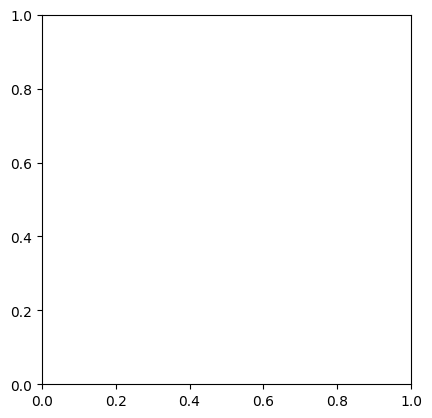

In [27]:
show(arr[:10])